## Looking at Metric Values

In this notebook, we take a closer look at the single number metrics and some
tests. Please be familiar with the TutorialNotebook before looking at this
notebook.

First we set up out environment as before:


In [1]:
# Add ldcpy root to system path
import sys
sys.path.insert(0,'../../../')
                    
# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2
import ldcpy

#display the plots in this notebook
%matplotlib inline

As in the TutorialNotebook, we will use the surface temperature (TS) and
precipitation rate (PRECT) sample data from ldcpy. We make a collection using
ldcpy.open_datasets() for each variable.


In [2]:
# ts_col contains TS data
ts_col = ldcpy.open_datasets(
    ["TS"],
    [
        "../../../data/cam-fv/orig.TS.100days.nc",
        "../../../data/cam-fv/zfp1.0.TS.100days.nc",
        "../../../data/cam-fv/zfp1e-1.TS.100days.nc",
        "../../../data/cam-fv/zfp1e-3.TS.100days.nc",
    ],
    ["orig", "zfp1.0", "zfp1e-1", "zfp1e-3"],
)
# prect_col contains PRECT data
prect_col = ldcpy.open_datasets(
    ["PRECT"],
    [
        "../../../data/cam-fv/orig.PRECT.60days.nc",
        "../../../data/cam-fv/zfp1e-7.PRECT.60days.nc",
        "../../../data/cam-fv/zfp1e-9.PRECT.60days.nc",
        "../../../data/cam-fv/zfp1e-11.PRECT.60days.nc",
    ],
    ["orig", "zfp1e-7", "zfp1e-9", "zfp1e-11"],
)

dataset size in GB 0.09

dataset size in GB 0.05



## Surface Temperature

Let's look at the statistic for each of the three compressed variants of TS. The
zfp1.0 set has been compressed with an absolute error tolerance of 1.0, whereas
the zfp1e-1 and zfp1e-3 sets have been compressed with an absolute error
tolerance of 1.0e-1 and 1.0e-3, respectively. Therefore, we expect the second
set to be more accurate. We will just look at the first time slice.

Here is the first set:


In [3]:
ldcpy.compare_stats(ts_col, "TS", "orig", "zfp1.0", time=0)

Comparing orig data (set1) to zfp1.0 data (set2) at time = 0
 
mean set1: 274.7
mean set2: 274.7
mean diff: 0.005767
 
variance set1: 534
variance set2: 533.7
 
standard deviation set1: 23.11
standard deviation set2: 23.1
 
max value set1: 315.6
max value set2: 315.6
min value set1: 216.7
min value set2: 216.8
 
max abs diff: 0.4059
min abs diff: 0
mean abs diff: 0.05852
mean squared diff: 3.326e-05
root mean squared diff: 0.07527
normalized root mean squared diff: 0.0007615
normalized max pointwise error: 0.004106
pearson correlation coefficient: 1
ks p-value: 1
spatial relative error(% > 0.0001): 37.87
ssim: 0.9983


Now the second set. Note how much better the spatial relative error is now in
this set.


In [4]:
ldcpy.compare_stats(ts_col, "TS", "orig", "zfp1e-1", time=0)

Comparing orig data (set1) to zfp1e-1 data (set2) at time = 0
 
mean set1: 274.7
mean set2: 274.7
mean diff: 0.0003894
 
variance set1: 534
variance set2: 534
 
standard deviation set1: 23.11
standard deviation set2: 23.11
 
max value set1: 315.6
max value set2: 315.6
min value set1: 216.7
min value set2: 216.7
 
max abs diff: 0.02292
min abs diff: 0
mean abs diff: 0.004226
mean squared diff: 1.516e-07
root mean squared diff: 0.005336
normalized root mean squared diff: 5.398e-05
normalized max pointwise error: 0.0002319
pearson correlation coefficient: 1
ks p-value: 1
spatial relative error(% > 0.0001): 0
ssim: 0.9998


And now the most conservatively compressed set:


In [5]:
ldcpy.compare_stats(ts_col, "TS", "orig", "zfp1e-3", time=0)

Comparing orig data (set1) to zfp1e-3 data (set2) at time = 0
 
mean set1: 274.7
mean set2: 274.7
mean diff: 6.193e-06
 
variance set1: 534
variance set2: 534
 
standard deviation set1: 23.11
standard deviation set2: 23.11
 
max value set1: 315.6
max value set2: 315.6
min value set1: 216.7
min value set2: 216.7
 
max abs diff: 0.0003662
min abs diff: 0
mean abs diff: 6.594e-05
mean squared diff: 3.836e-11
root mean squared diff: 8.417e-05
normalized root mean squared diff: 8.516e-07
normalized max pointwise error: 3.705e-06
pearson correlation coefficient: 1
ks p-value: 1
spatial relative error(% > 0.0001): 0
ssim: 1


We can also use the check_metrics() function to see whether the first time slice
of any of these compressed variants passed the four tests (K-S, Pearson
Correlation, and Spatial Relative Error, and SSIM) suggested in:

A. H. Baker, H. Xu, D. M. Hammerling, S. Li, and J. Clyne, “Toward a
Multi-method Approach: Lossy Data Compression for Climate Simulation Data”, in
J.M. Kunkel et al. (Eds.): ISC High Performance Workshops 2017, Lecture Notes in
Computer Science 10524, pp. 30–42, 2017 (doi:10.1007/978-3-319-67630-2_3).

Note that the defaults for the tests are (and can be changed via optional
arguments):

    K-S test: fails if p-value < .05

    Pearson correlation coefficient test:  fails if coefficient < .99999

    Spatial relative error test: fails if > 5% of grid points fail relative error test

    SSIM test: fail if SSIM < .99995


In [6]:
num_fails = ldcpy.check_metrics(ts_col, "TS", "orig", "zfp1.0", time=0)

Evaluating 4 metrics for orig data (set1) and zfp1.0 data (set2) :
     PASSED pearson correlation coefficient test...(pcc = 0.99999 )
     PASSED ks test...(ks p_val = 1.0000 )
     *FAILED spatial relative error test ... (spre = 37.87  %)
     *FAILED SSIM test ... (ssim = 0.99829 )


In [8]:
num_fails = ldcpy.check_metrics(ts_col, "TS", "orig", "zfp1e-1", time=0)

Evaluating 4 metrics for orig data (set1) and zfp1e-1 data (set2) :
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     PASSED ks test...(ks p_val = 1.0000 )
     PASSED spatial relative error test ...(spre = 0.00  %)
     *FAILED SSIM test ... (ssim = 0.99984 )


Only the SSIM test failed - indicating a difference in the visualizations. Let's
take a look at plots of the values at time=0 (note that we specify start=0 and
end=1 to get the first slice):


 SSIM 1 & 2 =  0.99983



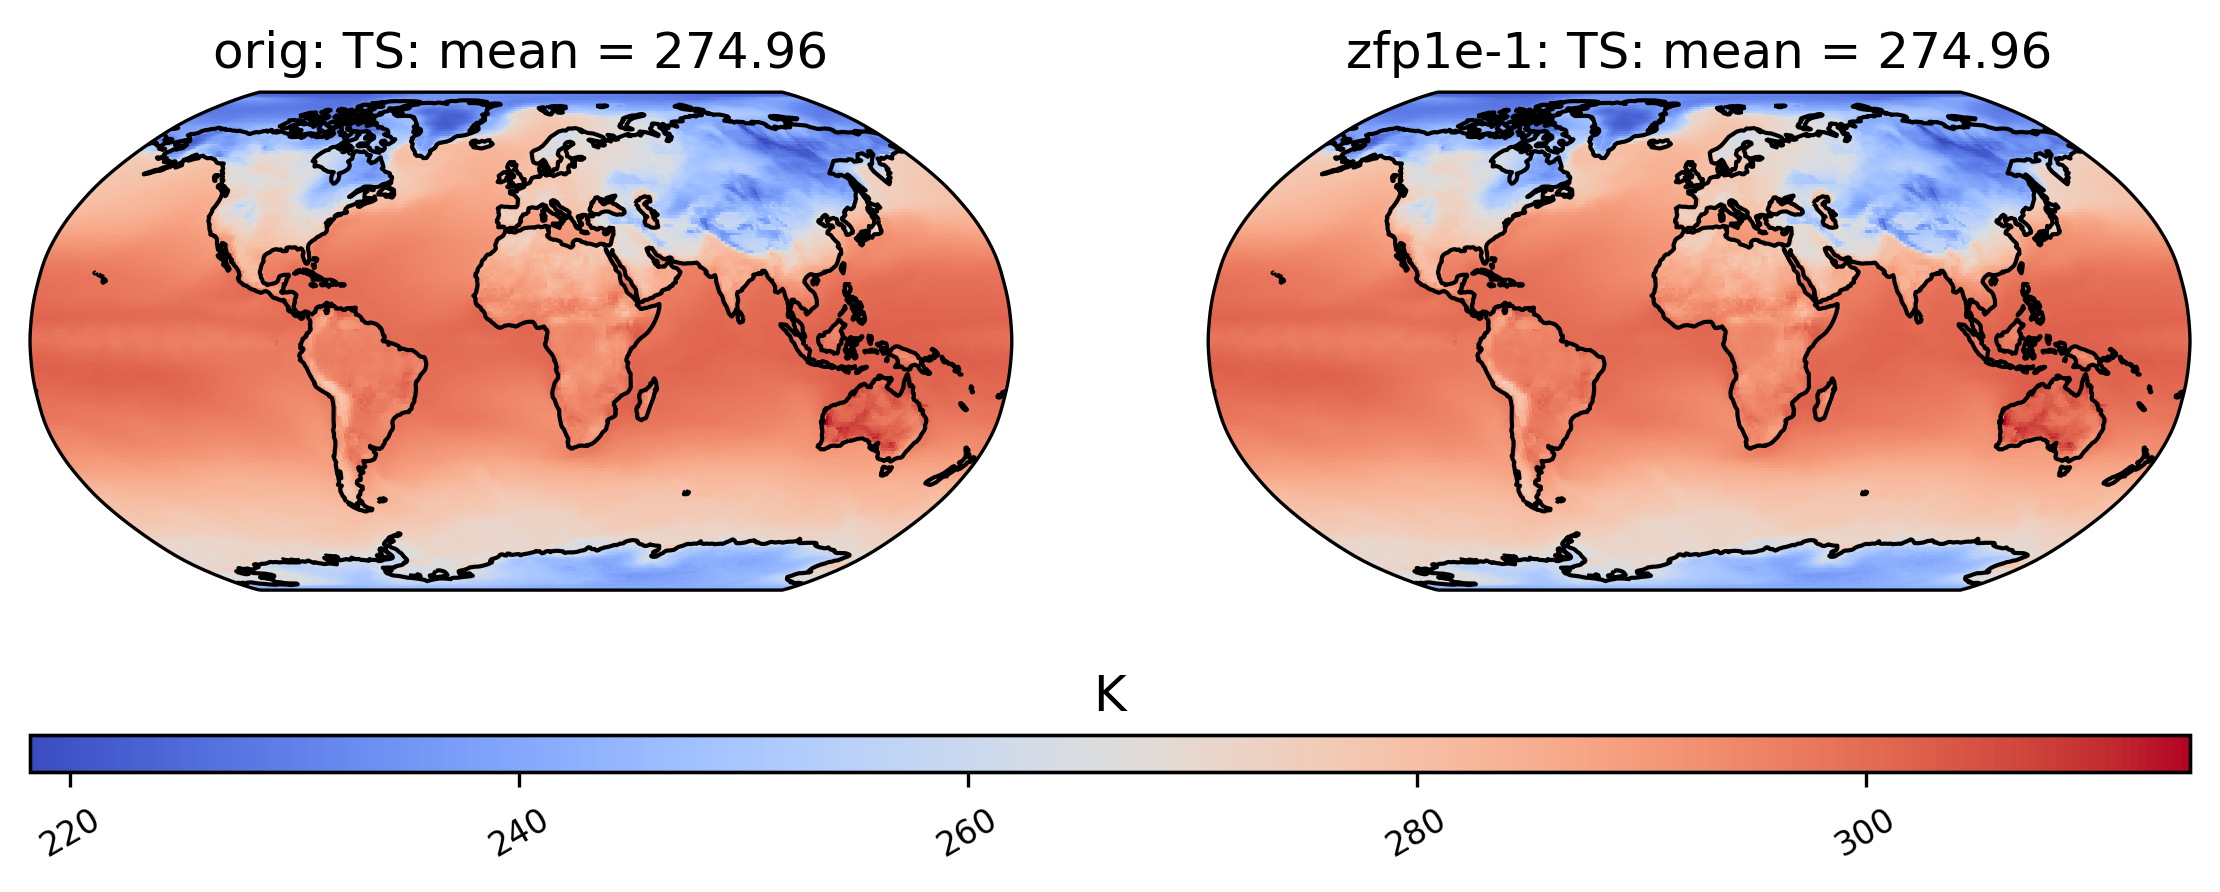

In [9]:
# comparison between mean TS values in col_ds for "orig" and "zfpA1.0" datasets at time=0
ldcpy.plot(
    ts_col,
    "TS",
    sets=["orig", "zfp1e-1"],
    metric="mean",
    plot_type="spatial",
    start=0,
    end=1,
    calc_ssim=True,
)

It's hard to see a difference here. Let's also look at the difference plot:


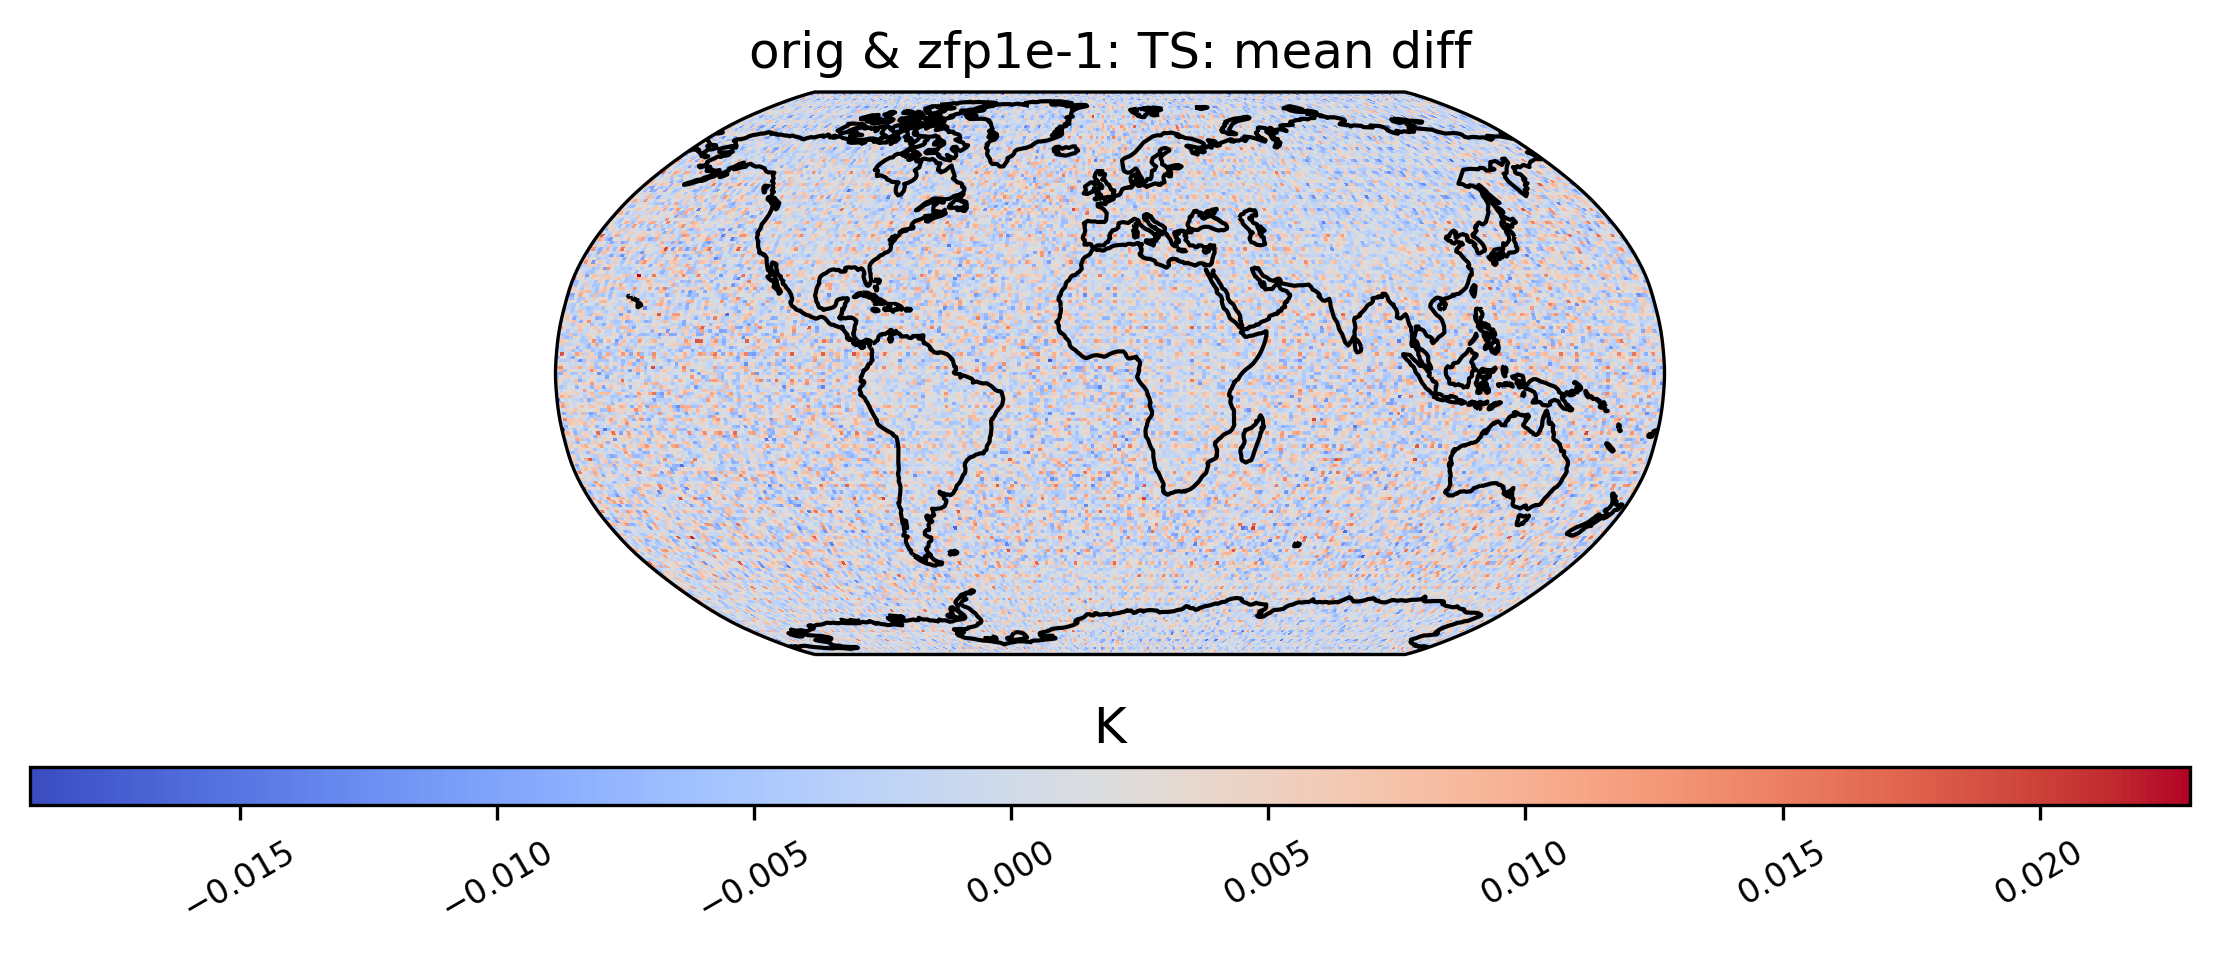

In [10]:
# make a difference plot
ldcpy.plot(
    ts_col,
    "TS",
    sets=["orig", "zfp1e-1"],
    metric="mean",
    plot_type="spatial",
    metric_type="diff",
    start=0,
    end=1,
)

So there are minor differences, which may or may not be important to subsequent
analysis. Note that we can adjust the SSIM tolerance to be less strict as
follows:


In [11]:
num_fails = ldcpy.check_metrics(
    ts_col, "TS", "orig", "zfp1e-1", time=0, ssim_tol=0.999
)

Evaluating 4 metrics for orig data (set1) and zfp1e-1 data (set2) :
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     PASSED ks test...(ks p_val = 1.0000 )
     PASSED spatial relative error test ...(spre = 0.00  %)
     PASSED SSIM test ... (ssim = 0.99984 )


Now we check the most conservative case (tol = 1e-3) and see that it passes all tests
(without modification).


In [12]:
num_fails = ldcpy.check_metrics(ts_col, "TS", "orig", "zfp1e-3", time=0)

Evaluating 4 metrics for orig data (set1) and zfp1e-3 data (set2) :
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     PASSED ks test...(ks p_val = 1.0000 )
     PASSED spatial relative error test ...(spre = 0.00  %)
     PASSED SSIM test ... (ssim = 1.00000 )


## Precipitation rate

We can similarly check the tests for the two different variants of compression
for PRECT. PRECT is a "harder" variable to compress than TS because it is less
smooth and has a larger range of magnitudes.


In [13]:
num_fails = ldcpy.check_metrics(prect_col, "PRECT", "orig", "zfp1e-7", time=0)

Evaluating 4 metrics for orig data (set1) and zfp1e-7 data (set2) :
     *FAILED pearson correlation coefficient test...(pcc = 0.99855 )
     *FAILED ks test...(ks p_val = 0.0000 )
     *FAILED spatial relative error test ... (spre = 64.78  %)
     *FAILED SSIM test ... (ssim = 0.99062 )


This tolerance of 1e-7 is clearly not appropriate for PRECT. Look at the
original data:


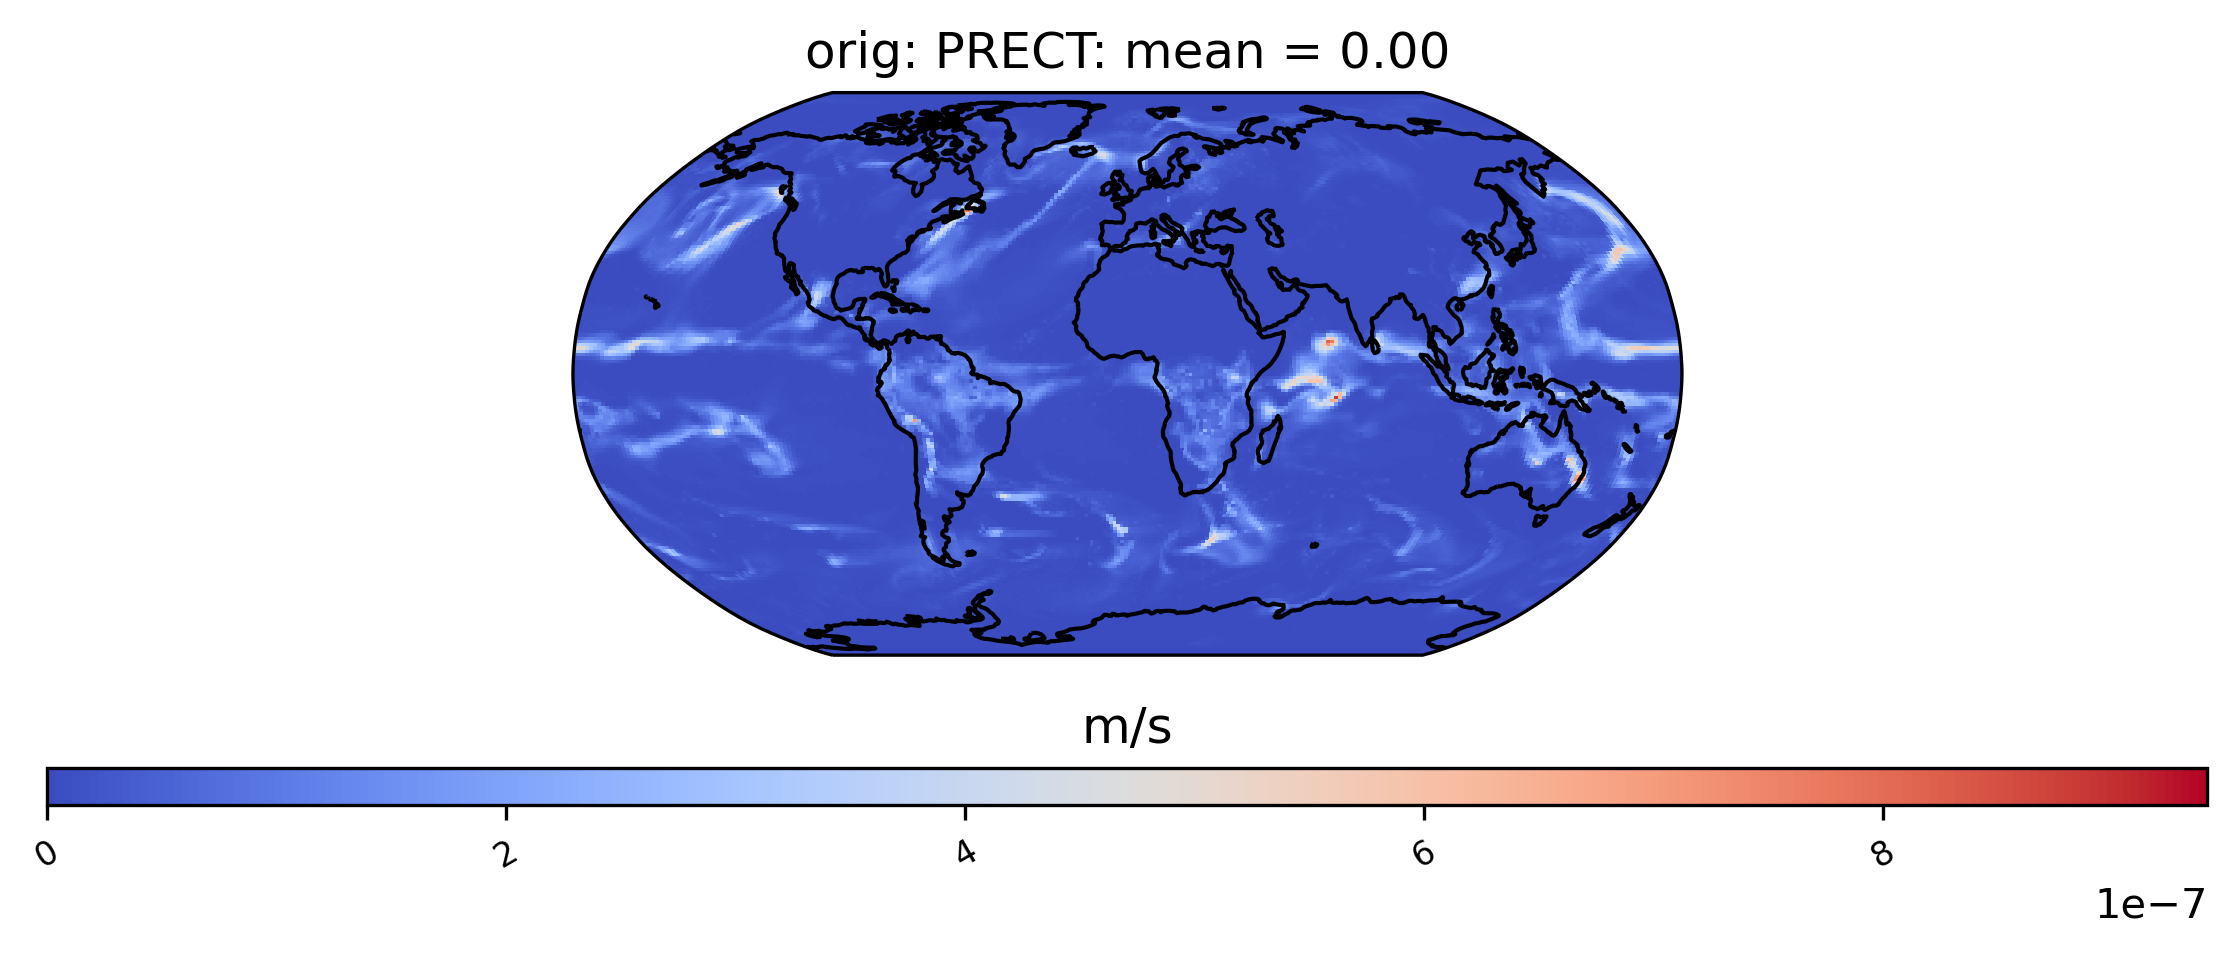

In [14]:
# plot of the mean TS values in the col_ds "orig" dataset
ldcpy.plot(prect_col, "PRECT", sets=["orig"], metric="mean", start=0, end=1)

And the compressed version is not very close...Let's look at the full stats and
then a difference plot.


In [15]:
ldcpy.compare_stats(prect_col, "PRECT", "orig", "zfp1e-7", time=0)

Comparing orig data (set1) to zfp1e-7 data (set2) at time = 0
 
mean set1: 2.305e-08
mean set2: 2.299e-08
mean diff: 5.903e-11
 
variance set1: 4.618e-15
variance set2: 4.636e-15
 
standard deviation set1: 6.796e-08
standard deviation set2: 6.809e-08
 
max value set1: 1.183e-06
max value set2: 1.17e-06
min value set1: -5.743e-22
min value set2: -1.863e-08
 
max abs diff: 2.186e-08
min abs diff: 0
mean abs diff: 2.288e-09
mean squared diff: 3.484e-21
root mean squared diff: 3.668e-09
normalized root mean squared diff: 0.0031
normalized max pointwise error: 0.0166
pearson correlation coefficient: 0.9985
ks p-value: 0
spatial relative error(% > 0.0001): 64.78
ssim: 0.9906


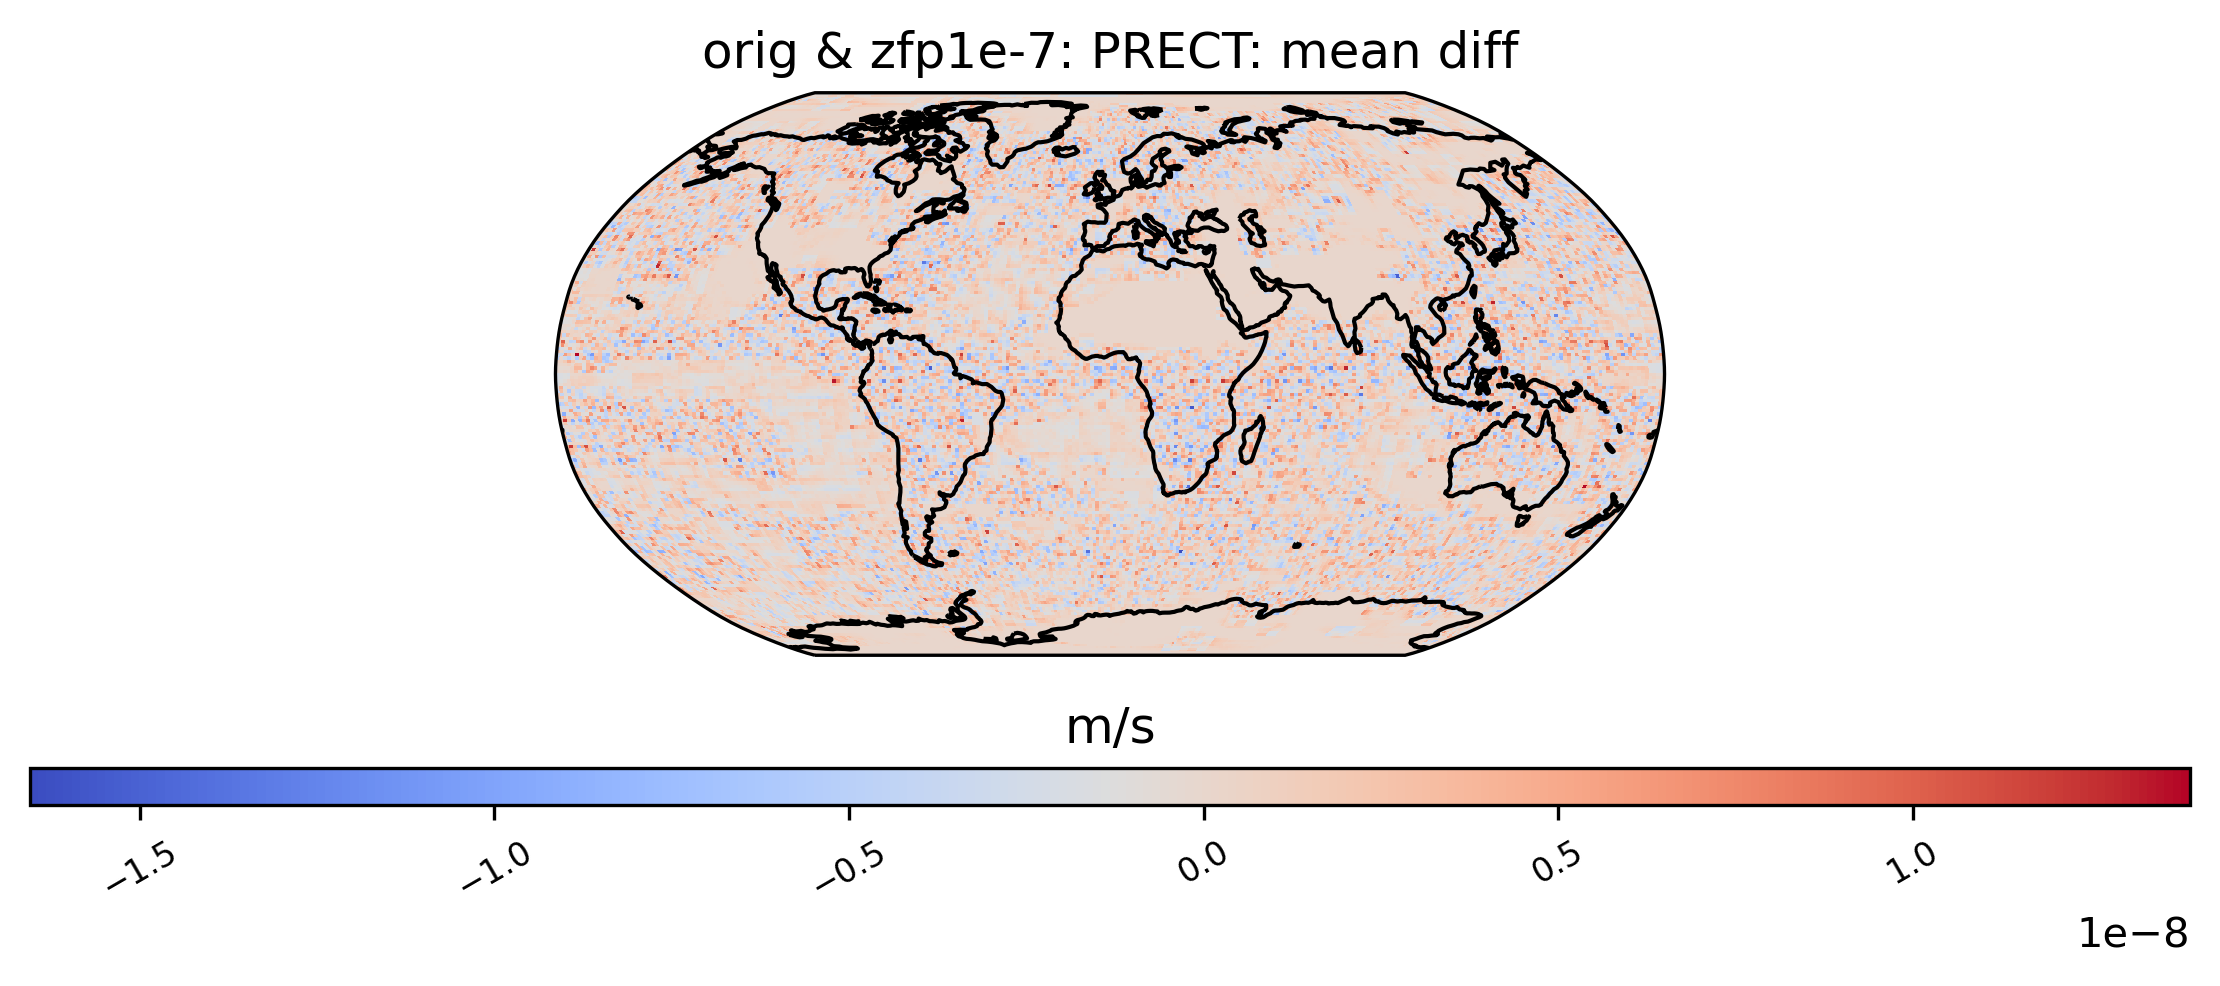

In [16]:
# make a difference plot
ldcpy.plot(
    prect_col,
    "PRECT",
    sets=["orig", "zfp1e-7"],
    metric="mean",
    plot_type="spatial",
    metric_type="diff",
    start=0,
    end=1,
)

Now let's look at the other 2:


In [17]:
num_fails = ldcpy.check_metrics(prect_col, "PRECT", "orig", "zfp1e-9", time=0)

Evaluating 4 metrics for orig data (set1) and zfp1e-9 data (set2) :
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     *FAILED ks test...(ks p_val = 0.0000 )
     *FAILED spatial relative error test ... (spre = 51.49  %)
     *FAILED SSIM test ... (ssim = 0.99994 )


In [18]:
num_fails = ldcpy.check_metrics(prect_col, "PRECT", "orig", "zfp1e-11", time=0)

Evaluating 4 metrics for orig data (set1) and zfp1e-11 data (set2) :
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     *FAILED ks test...(ks p_val = 0.0000 )
     *FAILED spatial relative error test ... (spre = 32.61  %)
     PASSED SSIM test ... (ssim = 1.00000 )


This last one with the zfp tolerance 1e-11 looks the best, but for this data
1e-12 would likely be a better choice. Let's look at the full stats and then a
difference plot.


In [19]:
ldcpy.compare_stats(prect_col, "PRECT", "orig", "zfp1e-11", time=0)

Comparing orig data (set1) to zfp1e-11 data (set2) at time = 0
 
mean set1: 2.305e-08
mean set2: 2.305e-08
mean diff: 8.51e-16
 
variance set1: 4.618e-15
variance set2: 4.618e-15
 
standard deviation set1: 6.796e-08
standard deviation set2: 6.796e-08
 
max value set1: 1.183e-06
max value set2: 1.183e-06
min value set1: -5.743e-22
min value set2: -2.331e-12
 
max abs diff: 2.824e-12
min abs diff: 0
mean abs diff: 4.556e-13
mean squared diff: 7.241e-31
root mean squared diff: 6.007e-13
normalized root mean squared diff: 5.077e-07
normalized max pointwise error: 2.387e-06
pearson correlation coefficient: 1
ks p-value: 0
spatial relative error(% > 0.0001): 32.61
ssim: 1


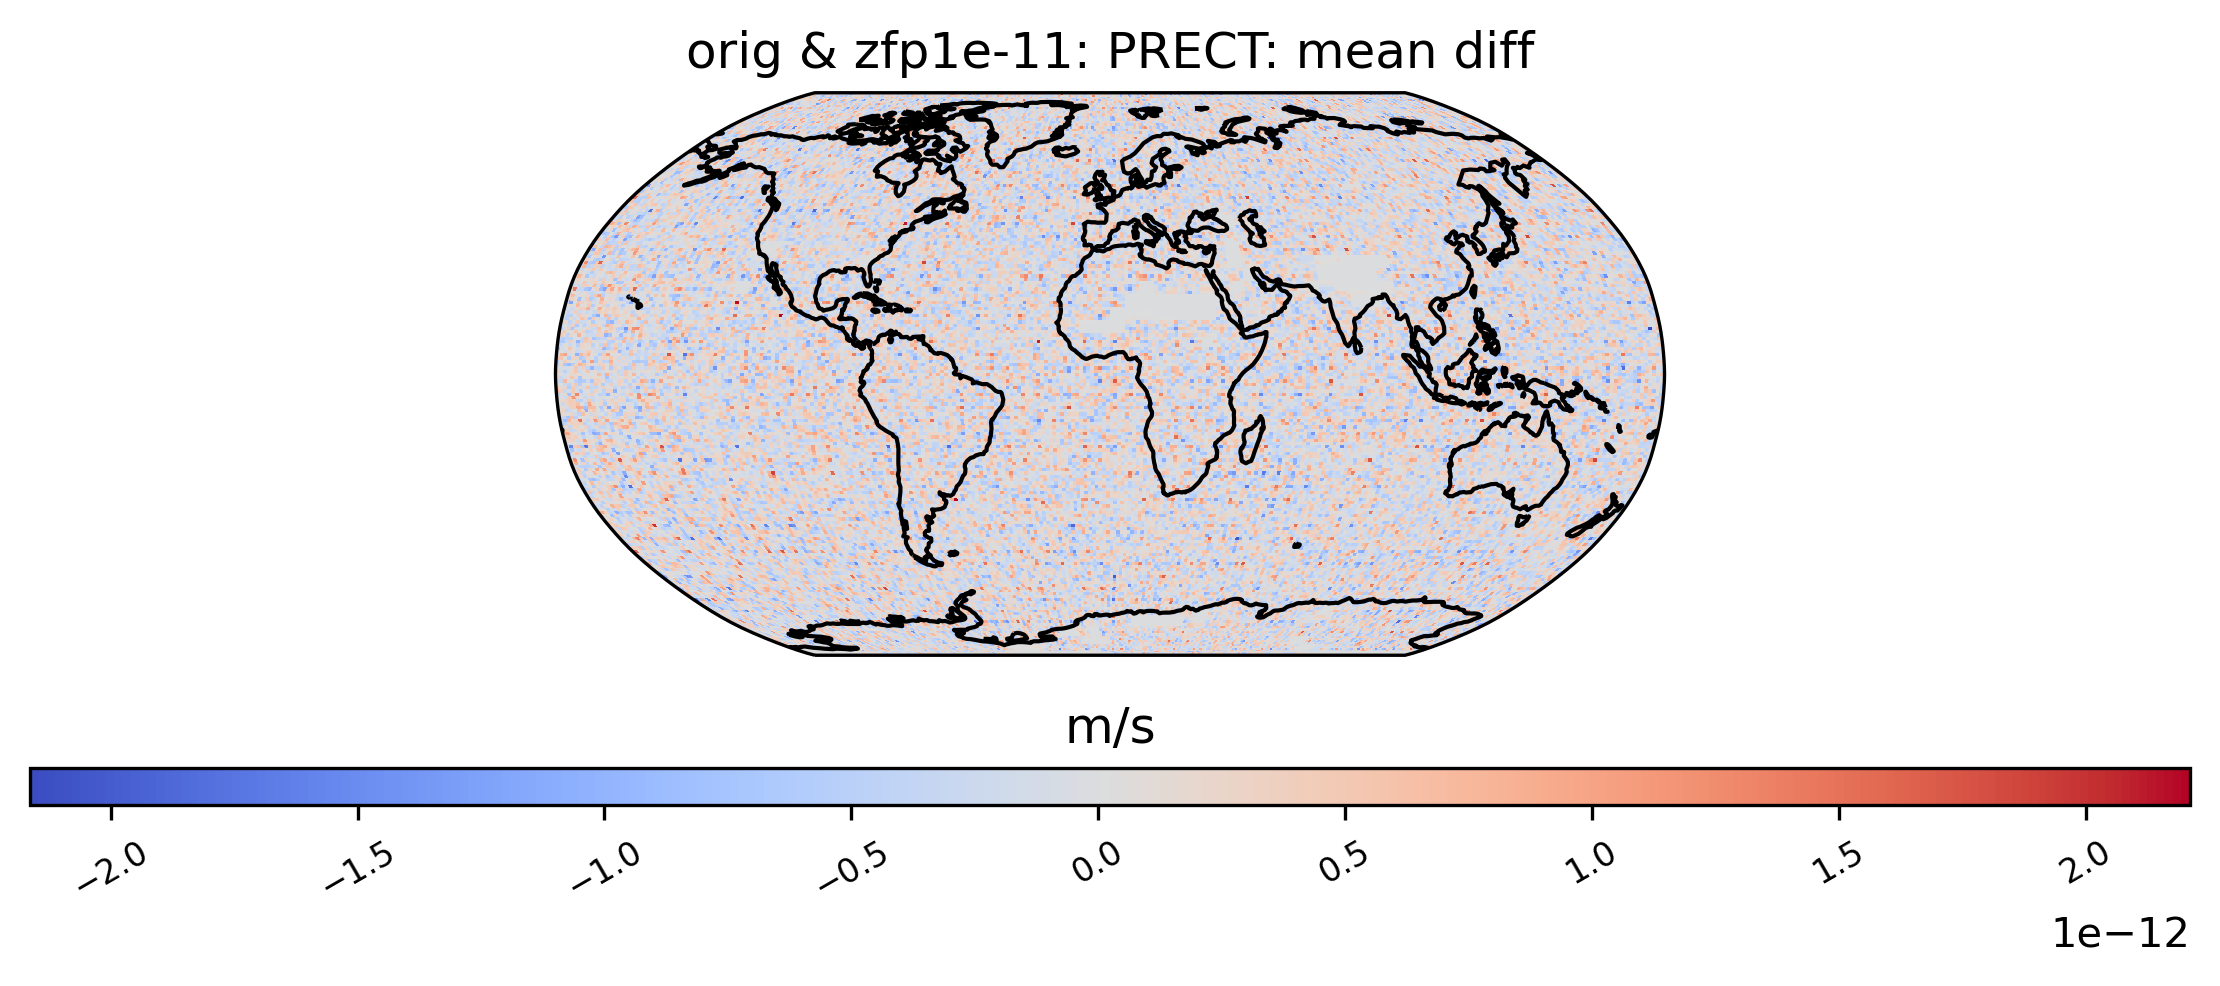

In [20]:
# make a difference plot
ldcpy.plot(
    prect_col,
    "PRECT",
    sets=["orig", "zfp1e-11"],
    metric="mean",
    plot_type="spatial",
    metric_type="diff",
    start=0,
    end=1,
)

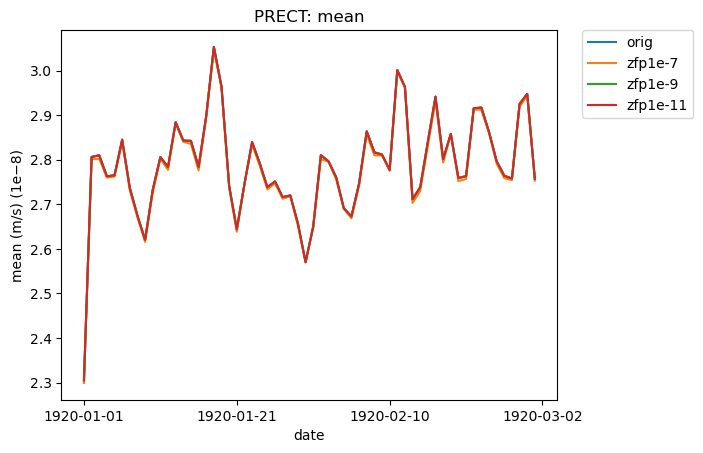

In [21]:
# Time-series plot of PRECT mean in prect_col datasets
ldcpy.plot(
    prect_col,
    "PRECT",
    sets=["orig", "zfp1e-7", "zfp1e-9", "zfp1e-11"],
    metric="mean",
    plot_type="time_series",
)